In [19]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import galsim

In [44]:
theta, phi = hp.pix2ang(32, 10307)
ra_cen = np.degrees(phi)
dec_cen = np.degrees(0.5 * np.pi - theta)

In [118]:
span_dec = 1.67
span_ra = span_dec / np.cos(np.deg2rad(dec_cen))
ra = np.linspace(ra_cen-span_ra, ra_cen+span_ra, 120)
dec = np.linspace(dec_cen-span_dec, dec_cen+span_dec, 120)
x1, y1 = np.meshgrid(ra, dec)
theta = np.pi / 2.0 - np.radians(y1)
phi = np.radians(x1)
in_pix = hp.ang2pix(32, theta, phi)
print(in_pix)
yy, xx = np.where(in_pix == 10307)
xy_points = np.column_stack((ra[xx], dec[yy]))
print(len(xy_points))

[[10430 10430 10430 ... 10432 10432 10432]
 [10430 10430 10430 ... 10432 10432 10432]
 [10430 10430 10430 ... 10432 10432 10432]
 ...
 [10178 10178 10178 ... 10180 10180 10180]
 [10178 10178 10178 ... 10180 10180 10180]
 [10178 10178 10178 ... 10180 10180 10180]]
4259


In [127]:
print(np.ceil((2*span_dec*3600 / 500)/0.2))

121.0


In [117]:
print((2*span_ra*3600 / 120)/0.2)
print((2*span_dec*3600 / 120)/0.2)

689.6149040879188
501.0


In [119]:
WORLD_ORIGIN = galsim.CelestialCoord(
    ra=xy_points[2][0] * galsim.degrees,
    dec=xy_points[2][1] * galsim.degrees,
)
wcs = galsim.TanWCS(
        affine=galsim.AffineTransform(
            0.2, 0, 0, 0.2,
            origin=galsim.PositionD(250, 250), # I need to know what Im considering the center, 
        ),                                  # since I use 0,0 as corner when sampling skycat
        world_origin=WORLD_ORIGIN,
        units=galsim.arcsec,
    )
corners = (
            (0, 0),
            (500 , 0),
            (500, 500),
            (0, 500),
        )
vertices = []
for x, y in corners:
    sky_coord = wcs.toWorld(galsim.PositionD(x, y))
    vertices.append([sky_coord.ra / galsim.degrees, sky_coord.dec / galsim.degrees])

vertices1 = np.array(vertices)

In [124]:
WORLD_ORIGIN = galsim.CelestialCoord(
    ra=xy_points[0][0] * galsim.degrees,
    dec=xy_points[0][1] * galsim.degrees,
)
wcs = galsim.TanWCS(
        affine=galsim.AffineTransform(
            0.2, 0, 0, 0.2,
            origin=galsim.PositionD(250, 250), # I need to know what Im considering the center, 
        ),                                  # since I use 0,0 as corner when sampling skycat
        world_origin=WORLD_ORIGIN,
        units=galsim.arcsec,
    )
corners = (
            (0, 0),
            (500 , 0),
            (500, 500),
            (0, 500),
        )
vertices = []
for x, y in corners:
    sky_coord = wcs.toWorld(galsim.PositionD(x, y))
    vertices.append([sky_coord.ra / galsim.degrees, sky_coord.dec / galsim.degrees])

vertices2 = np.array(vertices)

In [132]:
WORLD_ORIGIN.dec / galsim.degrees

-44.96458957837397

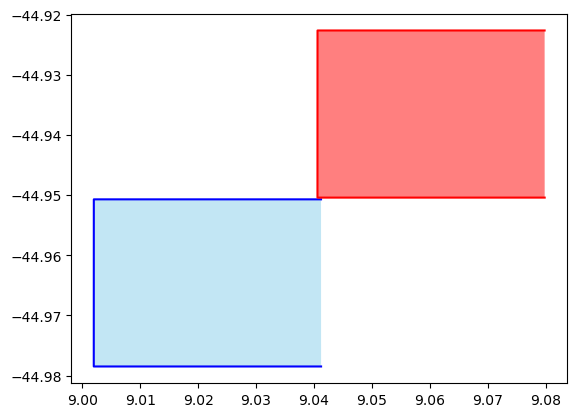

In [125]:
plt.plot(vertices2[:,0], vertices2[:,1], 'b-')  # pixel edges
plt.fill(vertices2[:,0], vertices2[:,1], 'skyblue', alpha=0.5) 
plt.plot(vertices1[:,0], vertices1[:,1], 'r-')  # pixel edges
plt.fill(vertices1[:,0], vertices1[:,1], 'red', alpha=0.5) 

In [41]:
print(wcs.toWorld(galsim.PositionD(50, 50)))
print(wcs.toWorld(galsim.PositionD(-100, 100)))

coord.CelestialCoord(0.2 radians, 0.0 radians)
coord.CelestialCoord(0.20014544410330729 radians, 4.848136756018226e-05 radians)


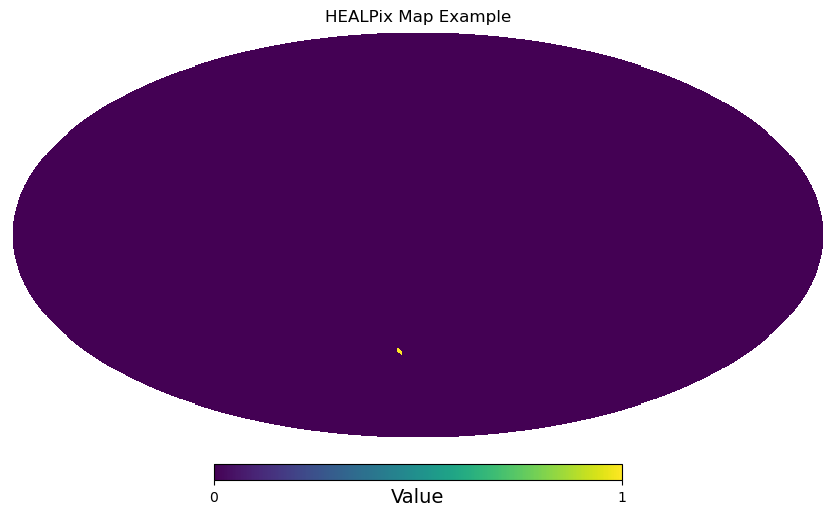

In [37]:
nside = 32  # resolution (number of pixels ~ 12 * nside^2)
pix = 10307
npix = hp.nside2npix(nside)
hp_map = np.zeros(npix)  # some data for each pixel
hp_map[pix] =1
# Mollweide projection
hp.mollview(hp_map, title="HEALPix Map Example", unit="Value")
plt.show()

0.8376558201507753


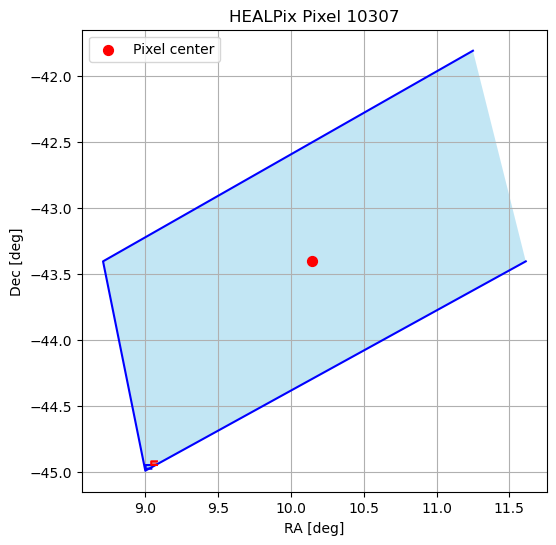

In [126]:
radius = 500
buffer = 100
vertices = hp.boundaries(nside, pix, step=1)  # shape (3, n_vertices)
x, y, z = vertices
theta = np.arccos(z)           # polar angle (0=North pole)
phi = np.arctan2(y, x)         # azimuthal angle
ra = np.degrees(phi)            # 0-360 degrees
ra = np.mod(ra, 360)           # ensure within 0-360
dec = 90 - np.degrees(theta)   

print(np.cos(np.mean(dec)))


plt.figure(figsize=(6,6))
plt.plot(ra, dec, 'b-')  # pixel edges
plt.fill(ra, dec, 'skyblue', alpha=0.5)  # optional: fill pixel
plt.scatter([np.mean(ra)], [np.mean(dec)], color='red', s=50, label='Pixel center')  # center
# plt.pcolormesh(x1, y1, np.ones((len(x1),len(y1))))
plt.plot(vertices2[:,0], vertices2[:,1], 'b-')  # pixel edges
plt.fill(vertices2[:,0], vertices2[:,1], 'skyblue', alpha=0.5) 
plt.plot(vertices1[:,0], vertices1[:,1], 'r-')  # pixel edges
plt.fill(vertices1[:,0], vertices1[:,1], 'red', alpha=0.5) 
plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
plt.title(f"HEALPix Pixel {pix}")
plt.legend()
plt.grid(True)
plt.show() 

In [7]:
area = hp.pixelfunc.nside2pixarea(32, True)
print((area * 3600**2/ (0.2**2)) / 500**2)

4350.898256774688


In [1]:
from main import SimCatVal
afw_img, cat, match, area = SimCatVal('/hildafs/home/pladuca/main/skyCatalog.yaml',250, 'i', 50, 0.7, 0.1, 30, True)

2025-11-13 18:34:06,381 - INFO - Catalog data will be read from /hildafs/home/pladuca/main/roman_rubin_cats_v1.1.2_faint/roman_rubin_cats_v1.1.2_faint/


Generating Sims


2025-11-13 18:34:10,020 - INFO - Working on healpix pixel 10307
2025-11-13 18:34:12,797 - INFO - Working on healpix pixel 10307


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/394 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Pipeline


  0%|          | 0/1 [00:00<?, ?it/s]

      coord_ra     
        rad        
-------------------
0.17746674215978903
0.17731559048893802
0.17734360445995787
 0.1772683515022203
0.17737101266924554
0.17730471233190795
0.17739019775983964
0.17746104799613435
0.17747296659067435
                ...
 0.1773444698685438
0.17737983092398923
0.17721148174813994
0.17724952924328724
0.17736683809764406
0.17727224386684365
0.17741801267983415
 0.1774659828771756
 0.1773906774212323
0.17734175827515689
Length = 34 rows


In [2]:
print(len(cat[0]))
print(len(match[0]))

34
34


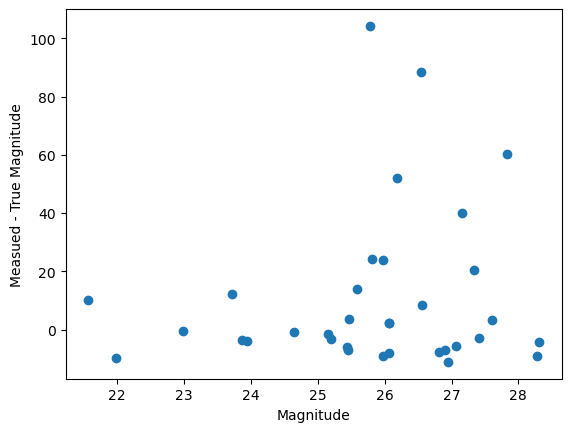

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def compare_matches(matches, coadd_zp):
    mag = matches['mag']
    mag_t = -2.5*np.log10(matches['flux']) + coadd_zp
    dif = (mag - mag_t) / mag
    dif = (matches['modelfit_CModel_instFlux'] - matches['flux'])/matches['flux'] * 100
    plt.scatter(mag, dif)
    plt.xlabel('Magnitude')
    plt.ylabel('Measued - True Magnitude')
    # plt.yscale('log')
    plt.show()
compare_matches(match[0], 30)


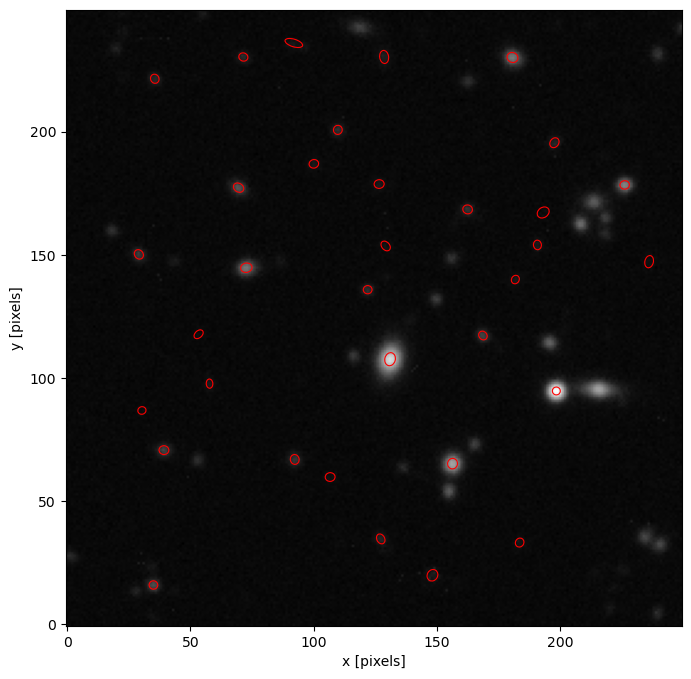

In [4]:
from matplotlib.patches import Ellipse
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize, AsinhStretch
#from lsst.geom import SpherePoint, degrees

def plot_sim_image(afw_img, cat=None):
    img = afw_img.image.array
    wcs = afw_img.wcs
    norm = ImageNormalize(img, interval=MinMaxInterval(), stretch=AsinhStretch(0.03))
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(img, origin='lower', cmap='gray', norm=norm) #apply a sinh stretch?
    if cat != None:
        for i in range(len(cat)):
            # sp = SpherePoint(cat['coord_ra'] * degrees, cat['coord_dec'] * degrees)
            # point = wcs.skyToPixel(sp)
            # x=point.getX()
            # y=point.getY()
            x = cat['base_SdssCentroid_x'][i]
            y = cat['base_SdssCentroid_y'][i]
            xx = cat['base_SdssShape_xx'][i]
            yy = cat['base_SdssShape_yy'][i]
            xy = cat['base_SdssShape_xy'][i]

            T = 0.5 * (xx + yy)
            D = np.sqrt(((xx - yy) / 2)**2 + xy**2)
            a = np.sqrt(T + D)
            b = np.sqrt(T - D)
            theta = 0.5 * np.arctan2(2 * xy, xx - yy)
            
            e = Ellipse((x, y), width=2*a, height=2*b,
                        angle=np.degrees(theta), edgecolor='red',
                        facecolor='none', lw=0.8)
            ax.add_patch(e)
    ax.set_xlabel('x [pixels]')
    ax.set_ylabel('y [pixels]')
    plt.show()

plot_sim_image(afw_img[0], cat[0])